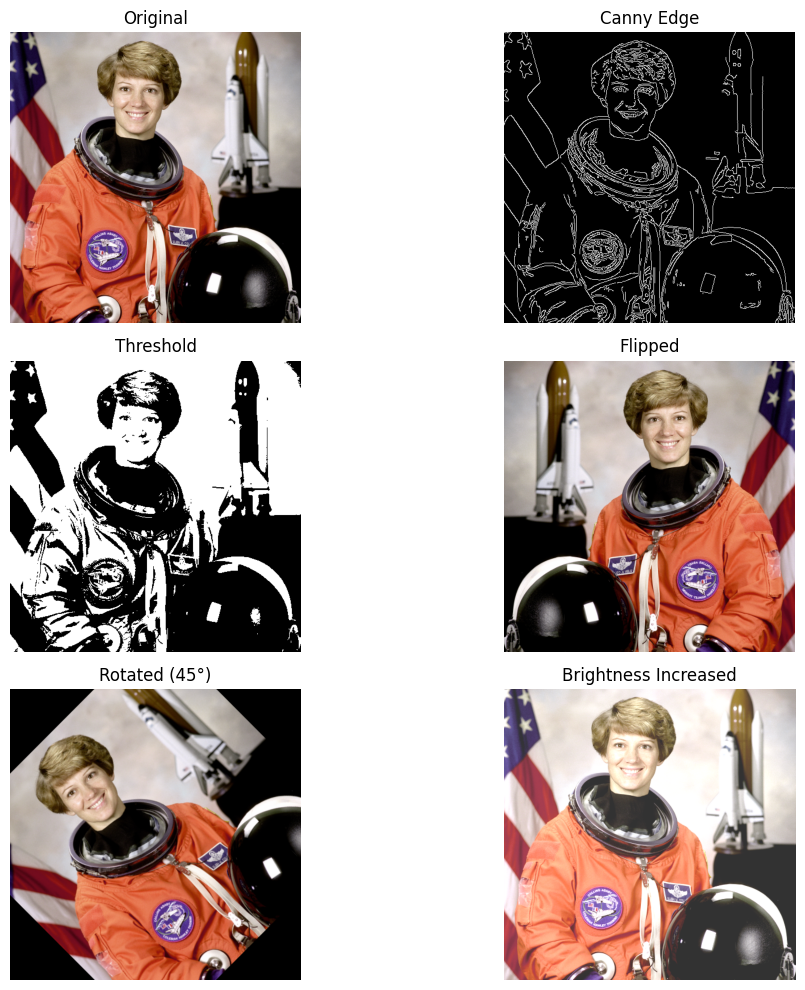

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


def load_image():
    image = data.astronaut()   # Built-in image
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image_bgr, image


def canny_edge(image_bgr):
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges


def threshold_image(image_bgr):
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return thresh


def flip_image(image_rgb):
    return cv2.flip(image_rgb, 1)


def rotate_image(image_rgb):
    (h, w) = image_rgb.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
    return cv2.warpAffine(image_rgb, matrix, (w, h))


def adjust_brightness(image_rgb):
    return cv2.convertScaleAbs(image_rgb, alpha=1, beta=50)



def display_results(original, edges, thresh, flipped, rotated, bright):
    plt.figure(figsize=(12,10))

    plt.subplot(3,2,1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(3,2,2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge")
    plt.axis("off")

    plt.subplot(3,2,3)
    plt.imshow(thresh, cmap='gray')
    plt.title("Threshold")
    plt.axis("off")

    plt.subplot(3,2,4)
    plt.imshow(flipped)
    plt.title("Flipped")
    plt.axis("off")

    plt.subplot(3,2,5)
    plt.imshow(rotated)
    plt.title("Rotated (45°)")
    plt.axis("off")

    plt.subplot(3,2,6)
    plt.imshow(bright)
    plt.title("Brightness Increased")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


def main():
    image_bgr, image_rgb = load_image()
    
    edges = canny_edge(image_bgr)
    thresh = threshold_image(image_bgr)
    flipped = flip_image(image_rgb)
    rotated = rotate_image(image_rgb)
    bright = adjust_brightness(image_rgb)
    
    display_results(image_rgb, edges, thresh, flipped, rotated, bright)


if __name__ == "__main__":
    main()